# Supervised Machine Learning In Python!!!!!!!!!!!!!!

In [3]:
import sklearn                # machine learning library
from sklearn import datasets  # sklearn has multiple datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [4]:
# load iris dataset 
iris = datasets.load_iris()

In [5]:
type(iris)

sklearn.utils.Bunch

In [6]:
print(iris.keys()) # printing the dictionary keys for dataset

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [7]:
# iris is in a numpy array format
type(iris.data), type(iris.target) 

(numpy.ndarray, numpy.ndarray)

In [9]:
# the data has 150 rows and 4 columns
iris.data.shape # 150 samples and 4 features

(150, 4)

In [11]:
# assign predictors and dependent to x and y and make dataframe
X = iris.data
y = iris.target
df = pd.DataFrame(X, columns=iris.feature_names)

In [12]:
# visualize dataframe
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


# KNN IMPLEMENTATION

In [18]:
from sklearn.model_selection import cross_validate # need to upload this before KNN
from sklearn.neighbors import KNeighborsClassifier # upload this at same time

In [20]:
knn = KNeighborsClassifier(n_neighbors = 6) # initialize how many neighbors you want k = 6 here
knn.fit(iris['data'], iris['target']) # the target here is target and features is data and fits model
# also format it like this knn.fit(X,y)!!!!!!!!!!!!!!

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [21]:
iris['data'].shape # This is what iris data looks like for memory

(150, 4)

In [22]:
iris['target'].shape # and targt variables

(150,)

PREDICTING ON UNLABELED DATA

In [30]:
# Here we make an random array of 4 features for implementing a model
X_new = np.array([[5.6,2.8,3.9,1.1], 
                [5.7,2.6,3.8,1.3],
                [4.7,3.2,1.3,0.2]])

prediciton = knn.predict(X_new) # use previous knn initalization of 6 k's as the model to predict new
X_new.shape 


(3, 4)

In [31]:
# lets print prediction
print('Prediction: {}'.format(prediciton)) 
# starting from left to right 1 is versicolor for first two observations or rows of new np data and 0 is for the last row predicting setosa color for third row

Prediction: [1 1 0]


MODEL PERFORMANCE

In [34]:
# First we need to split data
from sklearn.model_selection import train_test_split
# stratified sampling keeps the balance of classes (predictors and dependents=) for classifiers 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=21, stratify = y)

In [44]:
# lets make a prediction from the test data now
knn =KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train,y_train) # fit model on train
y_pred = knn.predict(X_test)

print(y_pred) # predictions

[2 1 2 2 1 0 1 0 0 1 0 2 0 2 2 0 0 0 1 0 2 2 2 0 1 1 1 0 0 1 2 2 0 0 1 2 2
 1 1 2 1 1 0 2 1]


In [42]:
# Model Accuracy Pretty Good!
knn.score(X_test,y_test)

0.9555555555555556

# KNN on digits dataset

In [45]:
# Load the digits dataset: digits
digits = datasets.load_digits()


In [46]:
# Print the keys and DESCR of the dataset
print(digits.keys())
print(digits.DESCR)

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping 

In [47]:
# Print the shape of the images and data keys
print(digits.images.shape)
print(digits.data.shape)

(1797, 8, 8)
(1797, 64)


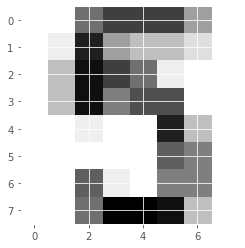

In [48]:
# Display digit 1010
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [49]:
# Create feature and target arrays
X = digits.data
y = digits.target

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

In [50]:
# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

0.9833333333333333


In [51]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

In [52]:
# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)


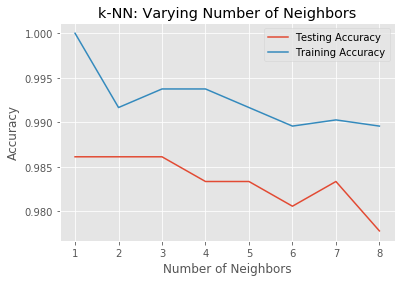

In [53]:
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [54]:
# as we can see the higher the k the lower the accuracy 